In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql

In [2]:
df_customer = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Guvi\capstone_2\Customers.csv",encoding='latin1') # prevent issues with character misinterpretation
df_customer

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [3]:
df_customer.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [4]:
df_customer['State Code'].fillna("N/A",inplace = True)
df_customer.isna().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [5]:
df_customer.dtypes

CustomerKey     int64
Gender         object
Name           object
City           object
State Code     object
State          object
Zip Code       object
Country        object
Continent      object
Birthday       object
dtype: object

In [6]:
#function to calculate age

import re
from datetime import datetime
def calculate_age(birthdate):
    if pd.isna(birthdate):
        return None
    today = datetime.today()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))


# Function to extract numeric value from string
def extract_numeric(value):
    numeric_string = re.sub(r'[^\d.]', '', value)
    return float(numeric_string) if numeric_string else 0.0


In [7]:
df_customer.columns = df_customer.columns.str.lower().str.replace(" ", "_")
df_customer['birthday'] = pd.to_datetime(df_customer['birthday'], errors='coerce')
df_customer['age'] = df_customer['birthday'].apply(calculate_age)

In [8]:
df_customer['zip_code'] = pd.to_numeric(df_customer['zip_code'], errors='coerce')

In [9]:
df_customer

,customerkey,gender,name,city,state_code,state,zip_code,country,continent,birthday,age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523.0,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522.0,Australia,Australia,1979-09-27,45
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380.0,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223.0,Australia,Australia,1957-09-17,67
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698.0,Australia,Australia,1965-11-19,58
...,...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017.0,United States,North America,1936-03-25,88
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101.0,United States,North America,1992-02-16,32
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405.0,United States,North America,1937-11-09,87
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501.0,United States,North America,1937-10-12,87


In [10]:
df_customer.dtypes

customerkey             int64
gender                 object
name                   object
city                   object
state_code             object
state                  object
zip_code              float64
country                object
continent              object
birthday       datetime64[ns]
age                     int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

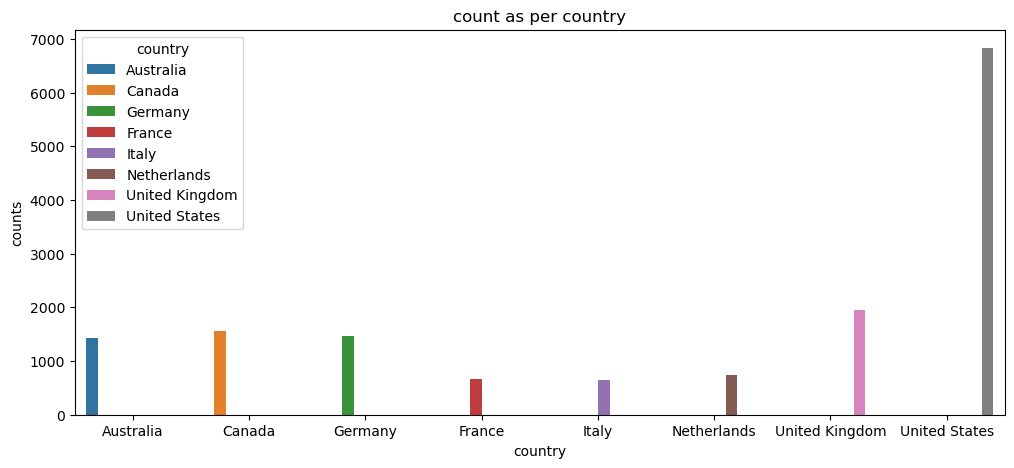

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(x = df_customer['country'],data=df_customer,hue="country")
plt.xlabel("country")
plt.ylabel("counts")
plt.title("count as per country")
plt.show

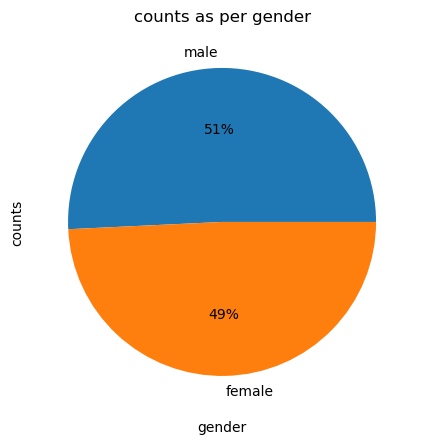

In [12]:
#visualize gender details

plt.figure(figsize=(12,5))
plt.pie(df_customer['gender'].value_counts(),autopct="%1.0f%%",labels=['male','female'])
plt.xlabel("gender")
plt.ylabel("counts")
plt.title("counts as per gender")
plt.show()
        

Sales Analysis

In [13]:
df_sales = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Guvi\capstone_2\Sales.csv")
df_sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [14]:
df_sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [15]:
df_sales.columns=df_sales.columns.str.lower().str.replace(" ","_")

In [16]:
df_sales['order_date'] = pd.to_datetime(df_sales['order_date'],errors="coerce" )


In [17]:
df_sales["delivery_date"] = pd.to_datetime(df_sales["delivery_date"],errors="ignore")


In [18]:
# Filter'order_date' or 'delivery_date' is missing
filtered_df = df_sales.dropna(subset=['order_date', 'delivery_date']).copy()

In [19]:
# Calculate the difference in days
filtered_df['date_difference'] = (filtered_df['delivery_date'] - filtered_df['order_date']).dt.days

In [20]:
#average difference
average_difference = filtered_df['date_difference'].mean()

In [21]:
#fill values with order_date + average_difference in delivery_date
df_sales['delivery_date'] = df_sales['delivery_date'].fillna(df_sales['order_date'])
df_sales['shipping_days'] = (df_sales['delivery_date'] - df_sales['order_date']).dt.days

In [22]:
df_sales

,order_number,line_item,order_date,delivery_date,customerkey,storekey,productkey,quantity,currency_code,shipping_days
0,366000,1,2016-01-01,2016-01-01,265598,10,1304,1,CAD,0
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,12
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,12
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,11
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,11
...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-20,1216913,43,632,3,USD,0
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR,4
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD,3
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD,3


In [23]:
df_sales.isnull().sum()

order_number     0
line_item        0
order_date       0
delivery_date    0
customerkey      0
storekey         0
productkey       0
quantity         0
currency_code    0
shipping_days    0
dtype: int64

In [24]:
df_sales.dtypes

order_number              int64
line_item                 int64
order_date       datetime64[ns]
delivery_date    datetime64[ns]
customerkey               int64
storekey                  int64
productkey                int64
quantity                  int64
currency_code            object
shipping_days             int64
dtype: object

Text(0.5, 1.0, 'counts as per currency')

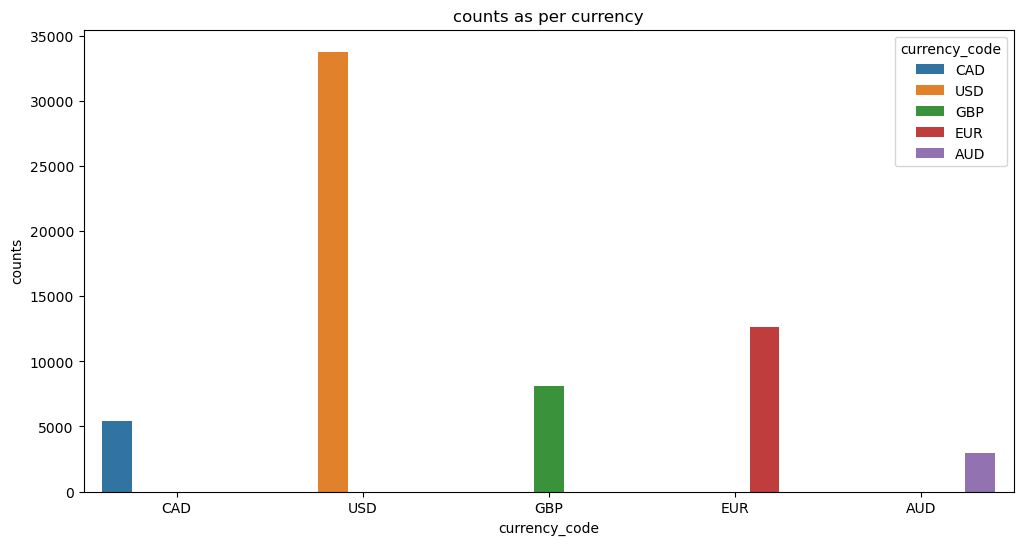

In [25]:
plt.figure(figsize=(12,6)) 
sns.countplot(x=df_sales["currency_code"],data=df_sales,hue="currency_code") 
plt.xlabel("currency_code") 
plt.ylabel("counts") 
plt.title("counts as per currency")

PRODUCT ANALYSIS

In [26]:
df_products = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Guvi\capstone_2\Products.csv",encoding = "latin1")
df_products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [27]:
df_products.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [28]:
df_products.dtypes

ProductKey         int64
Product Name      object
Brand             object
Color             object
Unit Cost USD     object
Unit Price USD    object
SubcategoryKey     int64
Subcategory       object
CategoryKey        int64
Category          object
dtype: object

In [29]:
df_products.columns = df_products.columns.str.lower().str.replace(" ", "_")

In [30]:
df_products

,productkey,product_name,brand,color,unit_cost_usd,unit_price_usd,subcategorykey,subcategory,categorykey,category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [31]:
df_products['unit_cost_usd'] = df_products['unit_cost_usd'].str.replace("$","")

In [32]:
df_products['unit_price_usd'] = df_products['unit_price_usd'].str.replace("$","")

In [33]:
df_products

,productkey,product_name,brand,color,unit_cost_usd,unit_price_usd,subcategorykey,subcategory,categorykey,category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1.71,3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1.71,3.35,505,Cell phones Accessories,5,Cell phones


In [34]:
product_labels = df_products["brand"].value_counts().index
product_labels

Index(['Contoso', 'Fabrikam', 'Litware', 'Proseware', 'Adventure Works',
       'Southridge Video', 'Wide World Importers', 'The Phone Company',
       'Tailspin Toys', 'A. Datum', 'Northwind Traders'],
      dtype='object', name='brand')

In [35]:
#visualize gender details

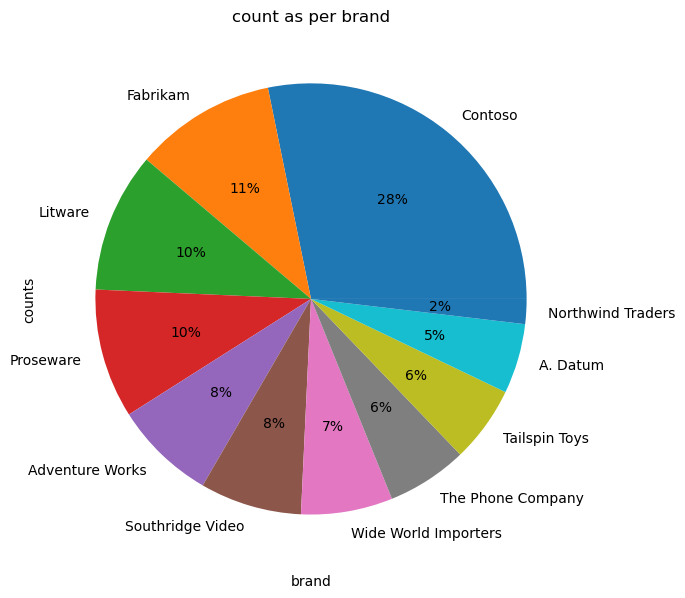

In [36]:
plt.figure(figsize=(12,7))
plt.pie(df_products["brand"].value_counts(),autopct='%1.0f%%',labels=product_labels)
plt.xlabel("brand")
plt.ylabel("counts")
plt.title('count as per brand')
plt.show()

STORE ANALYSIS


In [37]:
df_store = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Guvi\capstone_2\Stores.csv")
df_store

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [38]:
df_store.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [39]:
df_store['Square Meters'].fillna("0.0", inplace= True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11588\2974015999.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_store['Square Meters'].fillna("0.0", inplace= True)


In [40]:
df_store.columns = df_store.columns.str.lower().str.replace(" ", "_")
df_store['open_date'] = pd.to_datetime(df_store['open_date'], errors='coerce')

In [41]:
df_store

,storekey,country,state,square_meters,open_date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


Text(0.5, 1.0, 'counts as per country')

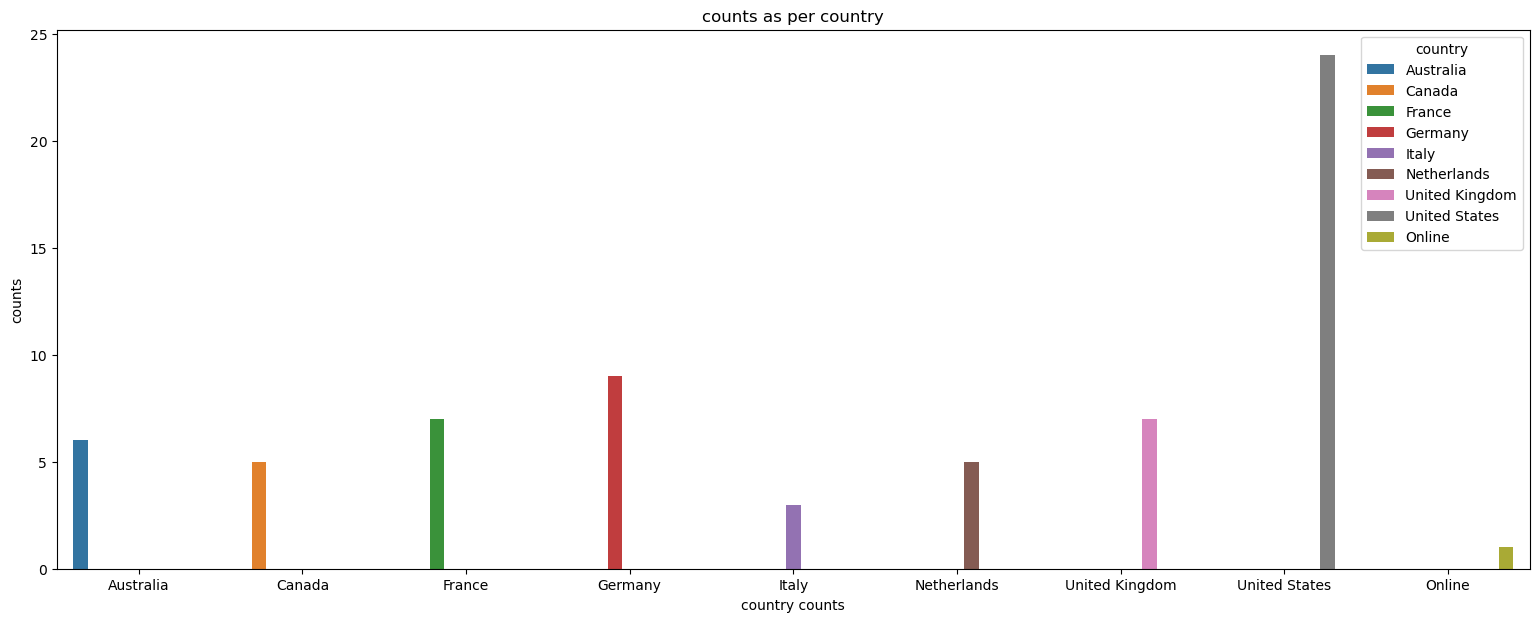

In [42]:
# visualize country counts
plt.figure(figsize=(19,7))
sns.countplot( x = df_store["country"], data = df_store, hue ='country')
plt.xlabel("country counts")
plt.ylabel("counts")
plt.title("counts as per country")

EXCHANGE RATE ANALYSIS 

In [43]:
df_exchange_rate=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Guvi\capstone_2\Exchange_Rates.csv")
df_exchange_rate

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [44]:
df_exchange_rate.columns = df_exchange_rate.columns.str.lower().str.replace(" ","_")
df_exchange_rate['date'] = pd.to_datetime(df_exchange_rate['date'], errors= 'coerce')

In [45]:
df_exchange_rate.loc[0:5]

,date,currency,exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415
5,2015-01-02,USD,1.0000


In [46]:
exchange_labels = df_exchange_rate['currency'].value_counts().index

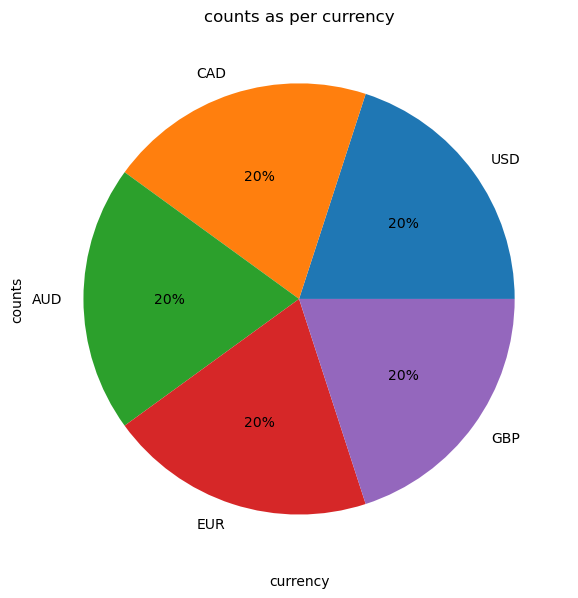

In [47]:
# visualize currency details
plt.figure(figsize=(12,7))
plt.pie(df_exchange_rate['currency'].value_counts(),autopct='%1.0f%%',labels = exchange_labels)
plt.xlabel("currency")
plt.ylabel("counts")
plt.title("counts as per currency")
plt.show()

In [48]:
# merge all datasets

In [49]:
merged_df = df_sales.merge(df_customer, on='customerkey', how='left')
merged_df = merged_df.merge(df_store, on='storekey', how='left', suffixes=('', '_store'))
merged_df = merged_df.merge(df_products, on='productkey', how='left', suffixes=('', '_product'))
merged_df = merged_df.merge(df_exchange_rate, left_on=['order_date', 'currency_code'], right_on=['date', 'currency'], how='left')
merged_df = merged_df.apply(lambda x: x.str.upper() if x.dtype == "object" else x)

In [50]:
merged_df

,order_number,line_item,order_date,delivery_date,customerkey,storekey,productkey,quantity,currency_code,shipping_days,...,color,unit_cost_usd,unit_price_usd,subcategorykey,subcategory,categorykey,category,date,currency,exchange
0,366000,1,2016-01-01,2016-01-01,265598,10,1304,1,CAD,0,...,WHITE,31.27,68.00,406,CAMERAS & CAMCORDERS ACCESSORIES,4,CAMERAS AND CAMCORDERS,2016-01-01,CAD,1.3884
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,12,...,SILVER,141.47,427.00,402,DIGITAL SLR CAMERAS,4,CAMERAS AND CAMCORDERS,2016-01-01,USD,1.0000
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,12,...,BLACK,220.64,665.94,803,MICROWAVES,8,HOME APPLIANCES,2016-01-01,USD,1.0000
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,11,...,ORANGE,148.08,322.00,402,DIGITAL SLR CAMERAS,4,CAMERAS AND CAMCORDERS,2016-01-01,CAD,1.3884
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,11,...,WHITE,166.20,326.00,301,LAPTOPS,3,COMPUTERS,2016-01-01,CAD,1.3884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-20,1216913,43,632,3,USD,0,...,WHITE,70.87,139.00,305,PROJECTORS & SCREENS,3,COMPUTERS,2021-02-20,USD,1.0000
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR,4,...,SILVER,55.18,120.00,106,BLUETOOTH HEADPHONES,1,AUDIO,2021-02-20,EUR,0.8238
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD,3,...,WHITE,56.08,109.99,602,MOVIE DVD,6,"MUSIC, MOVIES AND AUDIO BOOKS",2021-02-20,CAD,1.2610
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD,3,...,PINK,32.25,70.13,702,DOWNLOAD GAMES,7,GAMES AND TOYS,2021-02-20,CAD,1.2610


In [51]:
merged_df.isna().sum()

order_number          0
line_item             0
order_date            0
delivery_date         0
customerkey           0
storekey              0
productkey            0
quantity              0
currency_code         0
shipping_days         0
gender                0
name                  0
city                  0
state_code            0
state                 0
zip_code          15805
country               0
continent             0
birthday              0
age                   0
country_store         0
state_store           0
square_meters     49719
open_date             0
product_name          0
brand                 0
color                 0
unit_cost_usd         0
unit_price_usd        0
subcategorykey        0
subcategory           0
categorykey           0
category              0
date                  0
currency              0
exchange              0
dtype: int64

In [52]:
print(merged_df.describe)

<bound method NDFrame.describe of        order_number  line_item order_date delivery_date  customerkey  \
0            366000          1 2016-01-01    2016-01-01       265598   
1            366001          1 2016-01-01    2016-01-13      1269051   
2            366001          2 2016-01-01    2016-01-13      1269051   
3            366002          1 2016-01-01    2016-01-12       266019   
4            366002          2 2016-01-01    2016-01-12       266019   
...             ...        ...        ...           ...          ...   
62879       2243030          1 2021-02-20    2021-02-20      1216913   
62880       2243031          1 2021-02-20    2021-02-24       511229   
62881       2243032          1 2021-02-20    2021-02-23       331277   
62882       2243032          2 2021-02-20    2021-02-23       331277   
62883       2243032          3 2021-02-20    2021-02-23       331277   

       storekey  productkey  quantity currency_code  shipping_days  ...  \
0            10        130

In [53]:
merged_df['zip_code'].fillna("0.0",inplace = True)
merged_df['square_meters'].fillna("0.0",inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11588\1973124906.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_df['zip_code'].fillna("0.0",inplace = True)


In [54]:
merged_df.isna().sum()

order_number      0
line_item         0
order_date        0
delivery_date     0
customerkey       0
storekey          0
productkey        0
quantity          0
currency_code     0
shipping_days     0
gender            0
name              0
city              0
state_code        0
state             0
zip_code          0
country           0
continent         0
birthday          0
age               0
country_store     0
state_store       0
square_meters     0
open_date         0
product_name      0
brand             0
color             0
unit_cost_usd     0
unit_price_usd    0
subcategorykey    0
subcategory       0
categorykey       0
category          0
date              0
currency          0
exchange          0
dtype: int64

In [55]:
merged_df.dtypes

order_number               int64
line_item                  int64
order_date        datetime64[ns]
delivery_date     datetime64[ns]
customerkey                int64
storekey                   int64
productkey                 int64
quantity                   int64
currency_code             object
shipping_days              int64
gender                    object
name                      object
city                      object
state_code                object
state                     object
zip_code                  object
country                   object
continent                 object
birthday          datetime64[ns]
age                        int64
country_store             object
state_store               object
square_meters             object
open_date         datetime64[ns]
product_name              object
brand                     object
color                     object
unit_cost_usd             object
unit_price_usd            object
subcategorykey             int64
subcategor

In [56]:
merged_df.to_csv("merged_dataframe.csv",index=False)

In [57]:
merged_df.columns

Index(['order_number', 'line_item', 'order_date', 'delivery_date',
       'customerkey', 'storekey', 'productkey', 'quantity', 'currency_code',
       'shipping_days', 'gender', 'name', 'city', 'state_code', 'state',
       'zip_code', 'country', 'continent', 'birthday', 'age', 'country_store',
       'state_store', 'square_meters', 'open_date', 'product_name', 'brand',
       'color', 'unit_cost_usd', 'unit_price_usd', 'subcategorykey',
       'subcategory', 'categorykey', 'category', 'date', 'currency',
       'exchange'],
      dtype='object')

In [58]:
merged_df

,order_number,line_item,order_date,delivery_date,customerkey,storekey,productkey,quantity,currency_code,shipping_days,...,color,unit_cost_usd,unit_price_usd,subcategorykey,subcategory,categorykey,category,date,currency,exchange
0,366000,1,2016-01-01,2016-01-01,265598,10,1304,1,CAD,0,...,WHITE,31.27,68.00,406,CAMERAS & CAMCORDERS ACCESSORIES,4,CAMERAS AND CAMCORDERS,2016-01-01,CAD,1.3884
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,12,...,SILVER,141.47,427.00,402,DIGITAL SLR CAMERAS,4,CAMERAS AND CAMCORDERS,2016-01-01,USD,1.0000
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,12,...,BLACK,220.64,665.94,803,MICROWAVES,8,HOME APPLIANCES,2016-01-01,USD,1.0000
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,11,...,ORANGE,148.08,322.00,402,DIGITAL SLR CAMERAS,4,CAMERAS AND CAMCORDERS,2016-01-01,CAD,1.3884
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,11,...,WHITE,166.20,326.00,301,LAPTOPS,3,COMPUTERS,2016-01-01,CAD,1.3884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-20,1216913,43,632,3,USD,0,...,WHITE,70.87,139.00,305,PROJECTORS & SCREENS,3,COMPUTERS,2021-02-20,USD,1.0000
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR,4,...,SILVER,55.18,120.00,106,BLUETOOTH HEADPHONES,1,AUDIO,2021-02-20,EUR,0.8238
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD,3,...,WHITE,56.08,109.99,602,MOVIE DVD,6,"MUSIC, MOVIES AND AUDIO BOOKS",2021-02-20,CAD,1.2610
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD,3,...,PINK,32.25,70.13,702,DOWNLOAD GAMES,7,GAMES AND TOYS,2021-02-20,CAD,1.2610


In [59]:
# MySQL connection

mydb = pymysql.connect(host='localhost', user='root', password='Kiya@2215', database='project_2')
mycursor = mydb.cursor()


In [60]:
#CREATE TABLE 

In [61]:
create_table_query = """
CREATE TABLE IF NOT EXISTS merged_data(
order_number VARCHAR(255),
line_item VARCHAR(255),
order_date DATE,
delivery_date DATE,
customerkey VARCHAR(255),
storekey VARCHAR(255),
productkey VARCHAR(255),
quantity INT,
currency_code VARCHAR(255),
shipping_days VARCHAR(255),
gender VARCHAR(255),
name VARCHAR(255),
city VARCHAR(255),
state_code VARCHAR(255),
state VARCHAR(255),
zip_code FLOAT,
country VARCHAR(255),
continent VARCHAR(255),
birthday DATE,
age INT,
country_store VARCHAR(255),
state_store VARCHAR(255),
square_meters VARCHAR(255),
open_date DATE,
product_name VARCHAR(255),
brand VARCHAR(255),
color VARCHAR(255),
unit_cost_usd VARCHAR(255),
unit_price_usd VARCHAR(255),
subcategorykey INT,
subcategory VARCHAR(255),
categorykey INT,
category VARCHAR(255),
date DATE,
currency VARCHAR(255),
exchange FLOAT
)
"""
mycursor.execute(create_table_query)

0

In [62]:
data_list = merged_df.values.tolist()

In [63]:
insert_query = """
INSERT INTO merged_data (
        order_number, line_item, order_date, delivery_date,
        customerkey, storekey, productkey, quantity, currency_code,
        shipping_days, gender, name, city, state_code, state,
        zip_code, country, continent, birthday, age, country_store,
        state_store, square_meters, open_date, product_name, brand,
        color, unit_cost_usd, unit_price_usd, subcategorykey,
        subcategory, categorykey, category, date, currency,
        exchange
)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
        %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

mycursor.executemany(insert_query,data_list)

mydb.commit()




In [64]:
mycursor.close()
mydb.close()

In [65]:
# Sql Queries

In [ ]:
# 1.Customer segmentation by gender

select gender, count(distinct customerkey) as total_customers, sum(quantity * unit_price_usd) as total_sales
from merged_data
group by gender
order by total_sales desc

In [ ]:
# 2.To get total sales by year,month overtime

select date_format(order_date,"%Y-%m") as sales_month,sum(quantity * unit_price_usd) as total_sales
from merged_data
group by sales_month
order by sales_month asc

In [ ]:
# 3.To get top 5 most profitable product

select product_name,sum((unit_price_usd - unit_cost_usd) * quantity) as total_profit
from merged_data
group by product_name
order by total_profit desc
limit 5

In [ ]:
# 4. To get top 10 customers by spending amount

select customerkey,name,sum(quantity * unit_price_usd) as total_spent
from merged_data
group by customerkey,name
order by total_spent desc
limit 10;

In [ ]:
# 5. To get 10 best performing stores

select storekey,country_store , sum(quantity * unit_price_usd) as total_sales
from merged_data
group by storekey,country_store
order by total_sales desc
limit 10;

In [ ]:
# 6. To get sales by product category

select category,sum(quantity * unit_price_usd) as total_sales
from merged_data
group_by category
order by total_sales desc;


In [ ]:
# 7. To get average shipping days per order

select order_number, avg(shipping_days) as average_shipping_days
from merged_data
group by order_number
order by average_shipping_days desc;



In [ ]:
# 8. To get top 5 brands

select brand,sum((unit_price_usd - unit_cost_usd) * quantity) as total_profit
from merged_data
group by brand
order by total_profit desc
limit 5;

In [ ]:
# 9. To get product sales distribution by country

select country,product_name, sum(quantity) as total_quantity_sold, sum(unit_price_usd * quantity) as total_sales
from merged_data
group by country,product_name
order by country,total_sales desc;

In [ ]:
# 10. To get impact exchange rates on sales

select currency_code,sum(unit_price_usd * quantity * exchange) as adjusted_sales_usd
from merged_data
group by currency_code
order by adjusted_sales_usd desc;

